In [1]:
from MixedAutoencoder import Mixer, MixedAutoencoder
import MixedAutoencoder
from DataCleaning import *
import DataCleaning
import pandas as pd
import random
import matplotlib.pyplot as plt
import numpy as np
seed = 42
MixedAutoencoder.setRandom(seed)
DataCleaning.setRandom(seed)
base_path = "."
mixer = Mixer(base_path)

In [2]:
num_sets = 4
latent_dim = 3
model_shape = []
base_path = "."
label = f'demo_{num_sets}_{latent_dim}_[{"_".join([str(s) for s in model_shape])}]'
model_shape = []
key_list = [f'set{str(i)}' for i in range(1, num_sets+1)]
model_shapes = {k: model_shape for k in key_list}

In [3]:
data = pd.read_csv(f'{base_path}/data/16PF/data.csv', sep="\t")
data = clean_data(data)
column_keys = split_strat(data,num_sets, key_list)
data = split(data, column_keys)
train, test = make_train_test(data, 0.8)
input_dims = get_input_dims(train)

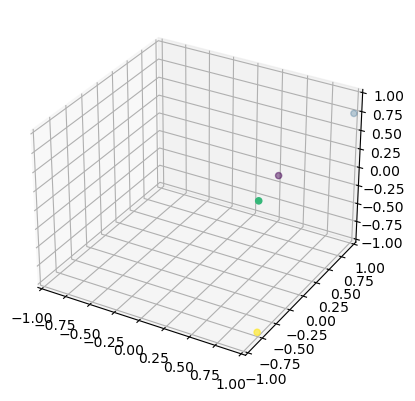

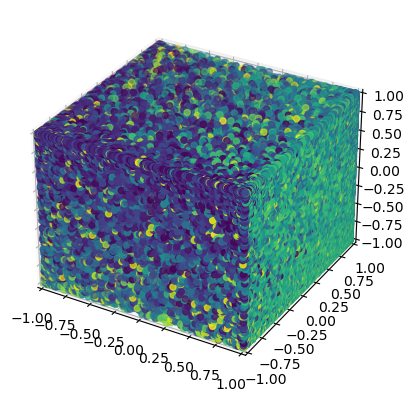

epoch 0
442/442 [==============================] - 5s 10ms/step - loss: 1.3027 - val_loss: 1.2104 - accuracy: 0.2317


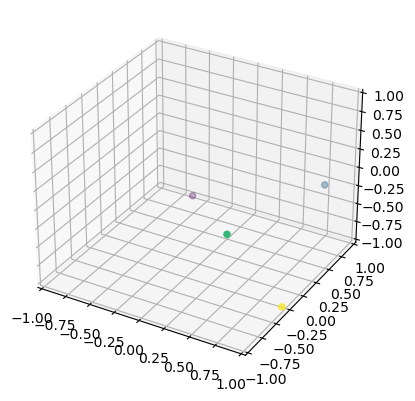

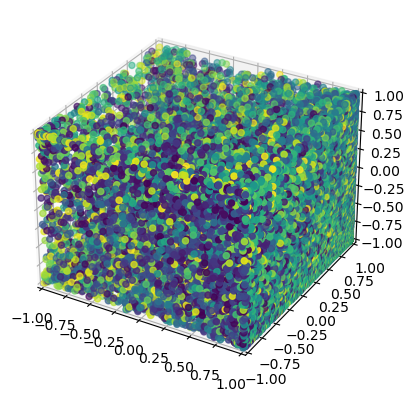

epoch 1
442/442 [==============================] - 4s 6ms/step - loss: 1.2147 - val_loss: 1.0927 - accuracy: 0.2964


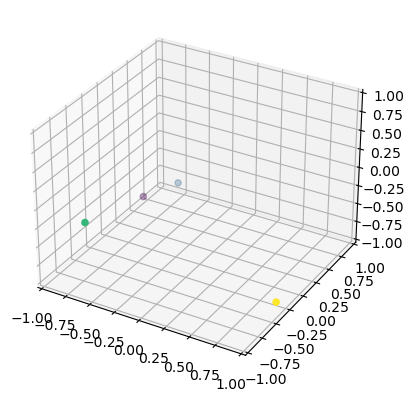

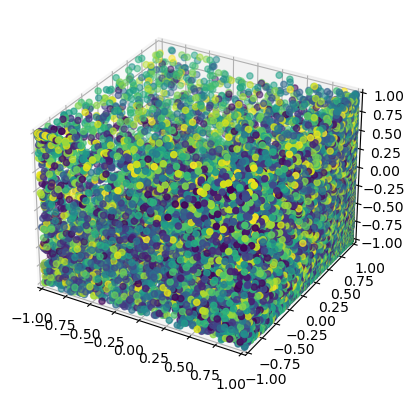

epoch 2
442/442 [==============================] - 5s 6ms/step - loss: 1.1599 - val_loss: 1.0170 - accuracy: 0.3136


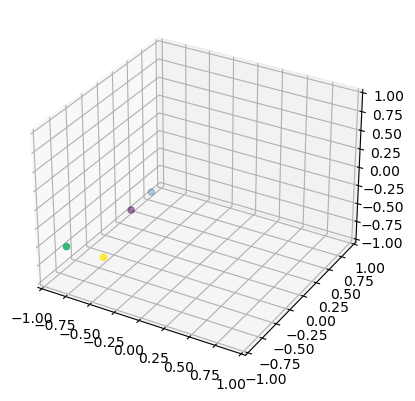

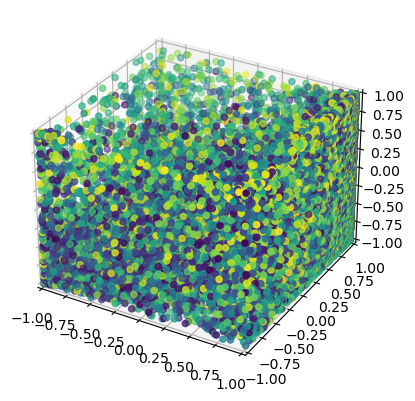

epoch 3
442/442 [==============================] - 5s 6ms/step - loss: 1.1121 - val_loss: 0.9648 - accuracy: 0.3447


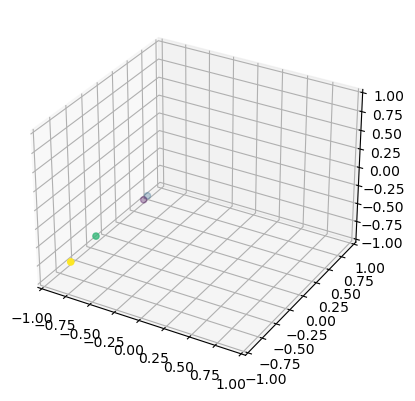

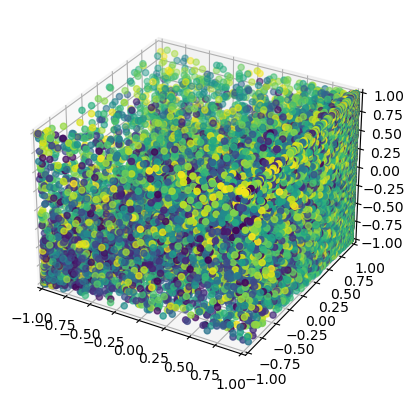

epoch 4
442/442 [==============================] - 4s 6ms/step - loss: 1.0901 - val_loss: 0.9435 - accuracy: 0.3523


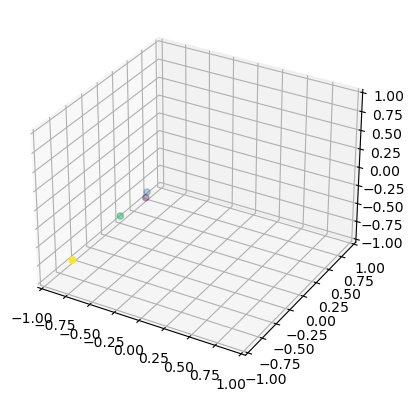

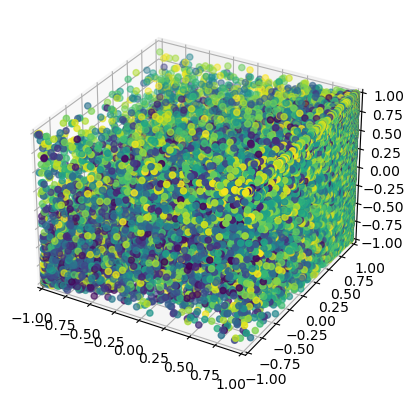

epoch 5
442/442 [==============================] - 4s 6ms/step - loss: 1.0753 - val_loss: 0.9332 - accuracy: 0.3563


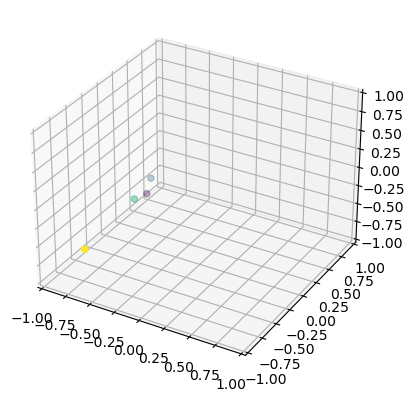

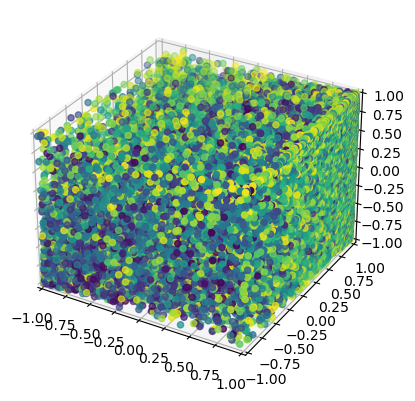

epoch 6
442/442 [==============================] - 4s 5ms/step - loss: 1.0580 - val_loss: 0.9248 - accuracy: 0.3590


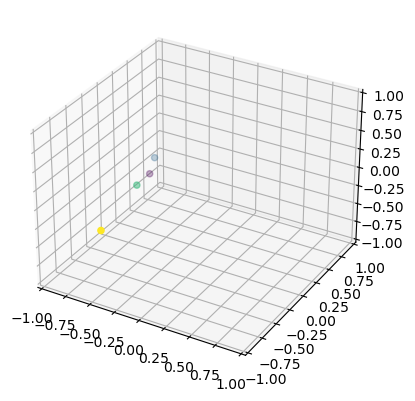

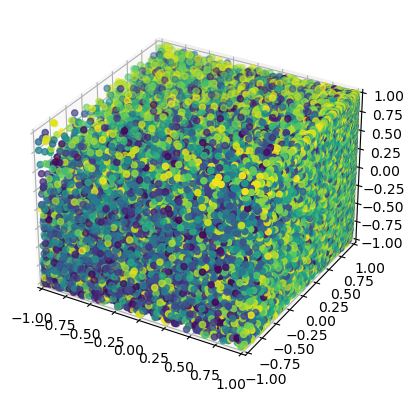

epoch 7
442/442 [==============================] - 4s 5ms/step - loss: 1.0395 - val_loss: 0.9112 - accuracy: 0.3641


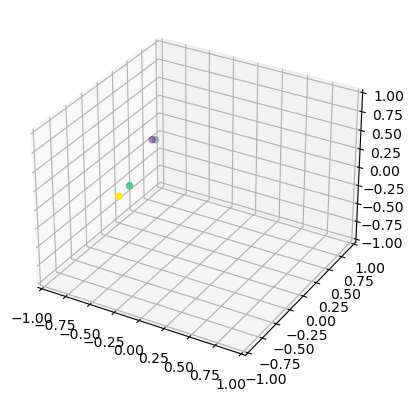

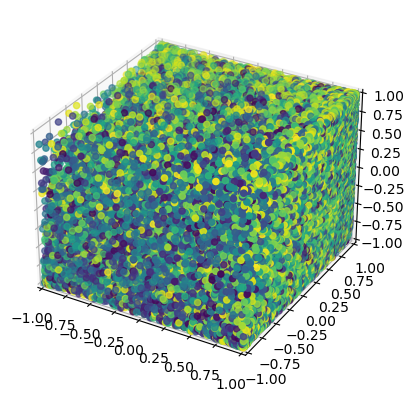

epoch 8
442/442 [==============================] - 5s 6ms/step - loss: 1.0263 - val_loss: 0.8949 - accuracy: 0.3714


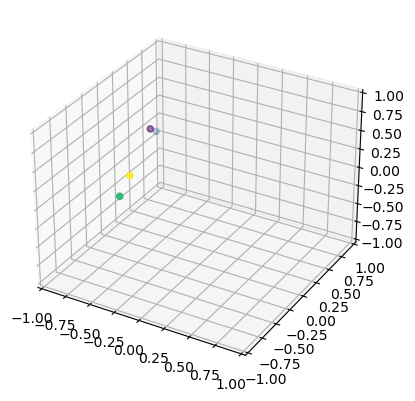

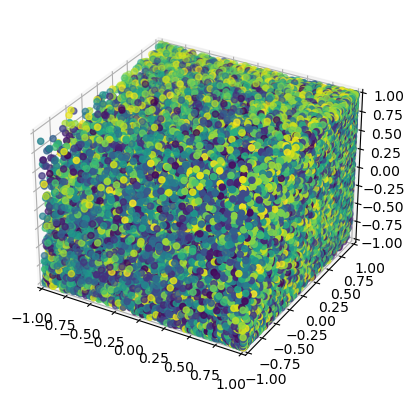

epoch 9
442/442 [==============================] - 4s 6ms/step - loss: 1.0164 - val_loss: 0.8794 - accuracy: 0.3794


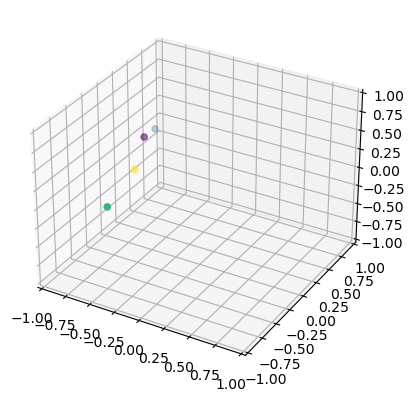

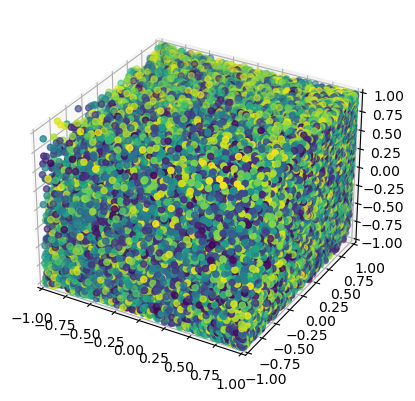

epoch 10
442/442 [==============================] - 4s 6ms/step - loss: 1.0080 - val_loss: 0.8658 - accuracy: 0.3851


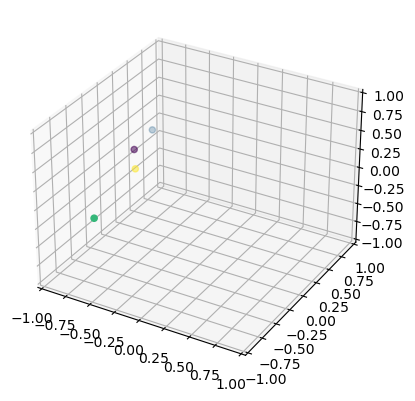

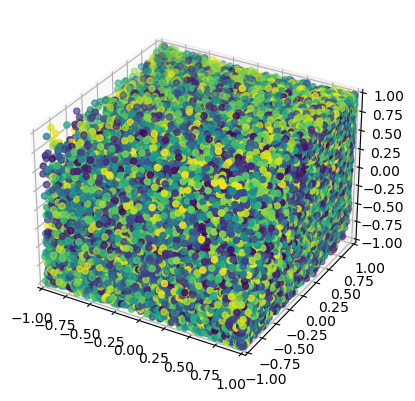

epoch 11
442/442 [==============================] - 4s 6ms/step - loss: 1.0010 - val_loss: 0.8550 - accuracy: 0.3908


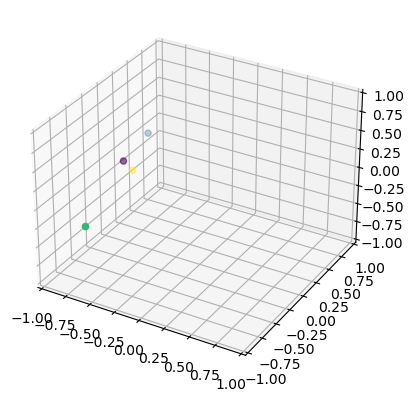

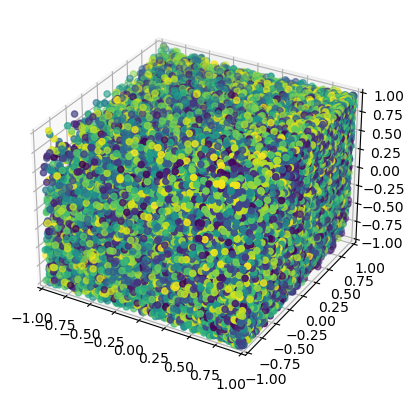

epoch 12
442/442 [==============================] - 4s 6ms/step - loss: 0.9954 - val_loss: 0.8473 - accuracy: 0.3958


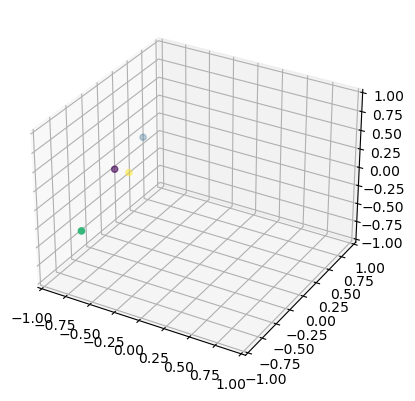

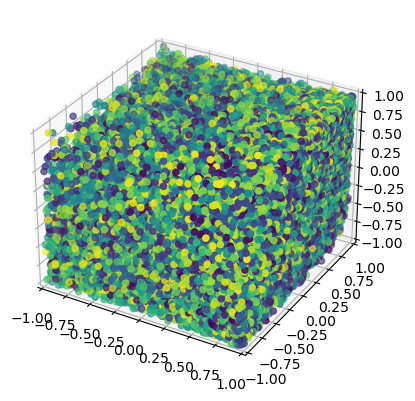

epoch 13
442/442 [==============================] - 4s 6ms/step - loss: 0.9909 - val_loss: 0.8417 - accuracy: 0.3986


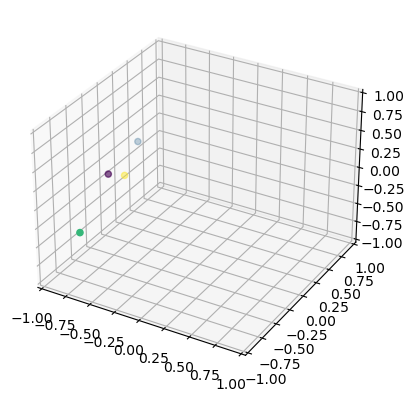

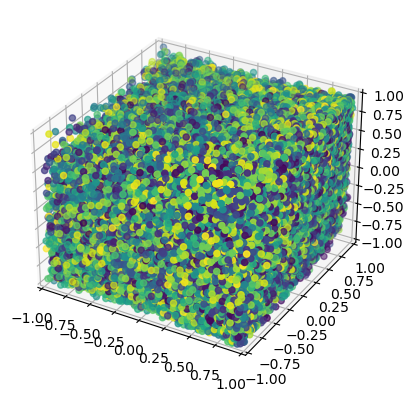

epoch 14
442/442 [==============================] - 5s 6ms/step - loss: 0.9873 - val_loss: 0.8377 - accuracy: 0.4021


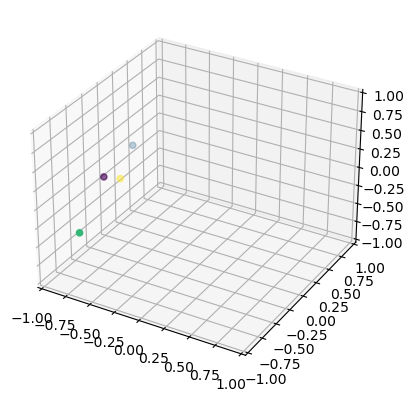

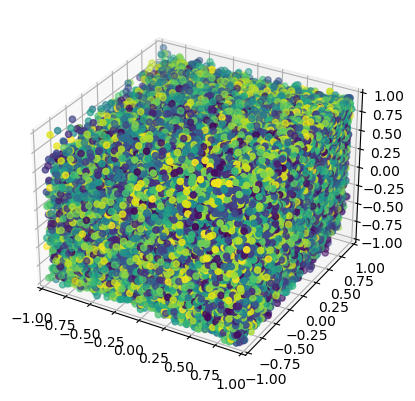

epoch 15
442/442 [==============================] - 4s 6ms/step - loss: 0.9843 - val_loss: 0.8348 - accuracy: 0.4034


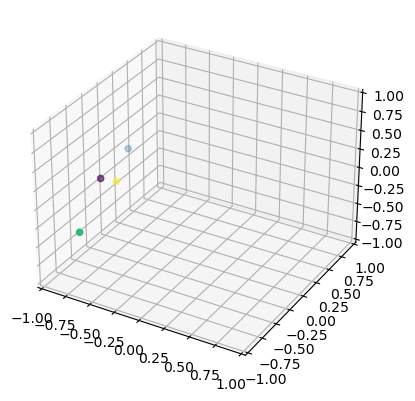

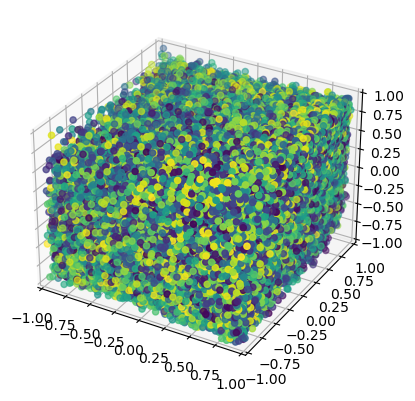

epoch 16
442/442 [==============================] - 5s 6ms/step - loss: 0.9819 - val_loss: 0.8326 - accuracy: 0.4063


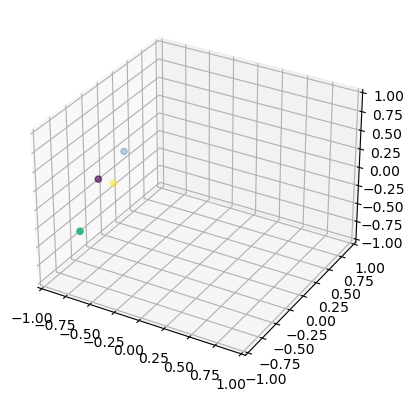

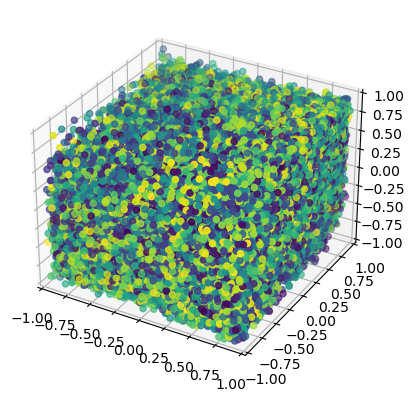

epoch 17
442/442 [==============================] - 4s 6ms/step - loss: 0.9799 - val_loss: 0.8311 - accuracy: 0.4070


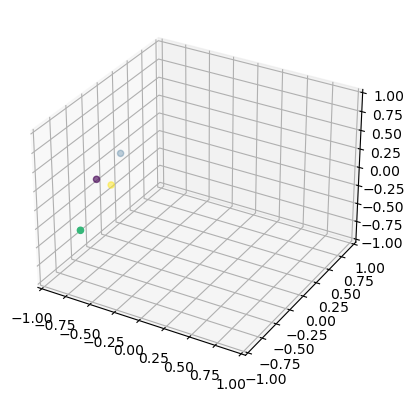

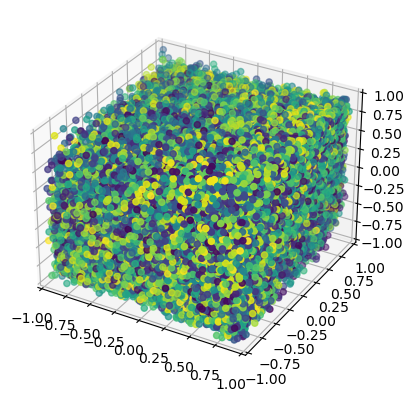

epoch 18
442/442 [==============================] - 4s 6ms/step - loss: 0.9783 - val_loss: 0.8298 - accuracy: 0.4088


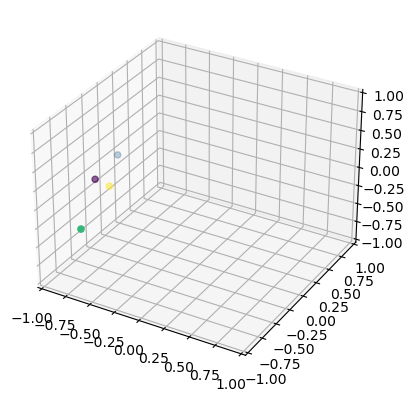

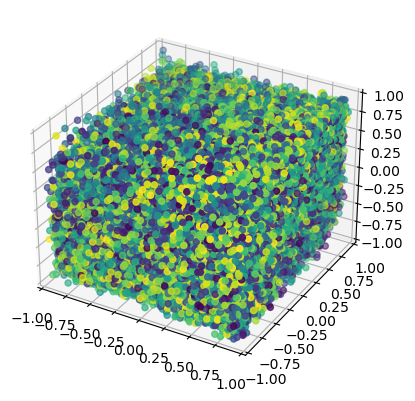

epoch 19
442/442 [==============================] - 6s 7ms/step - loss: 0.9770 - val_loss: 0.8288 - accuracy: 0.4107


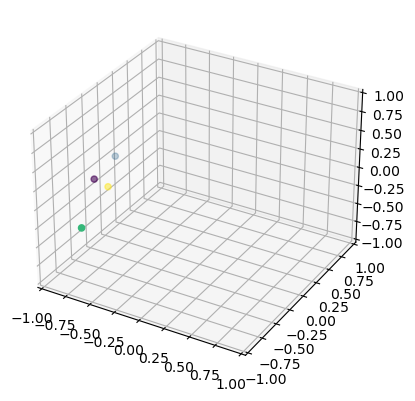

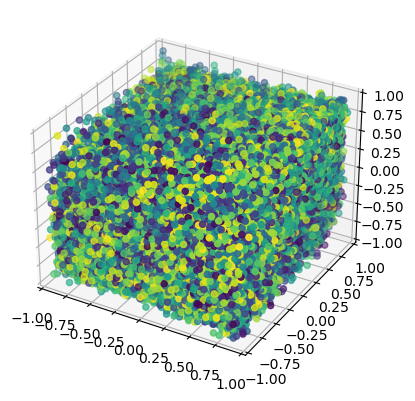

epoch 20
442/442 [==============================] - 6s 7ms/step - loss: 0.9759 - val_loss: 0.8281 - accuracy: 0.4131


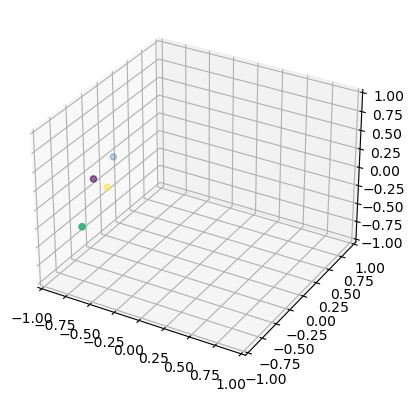

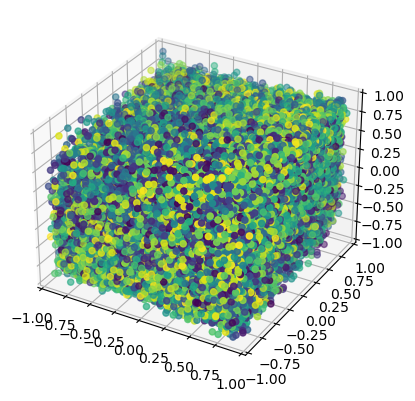

epoch 21
442/442 [==============================] - 5s 7ms/step - loss: 0.9750 - val_loss: 0.8275 - accuracy: 0.4133


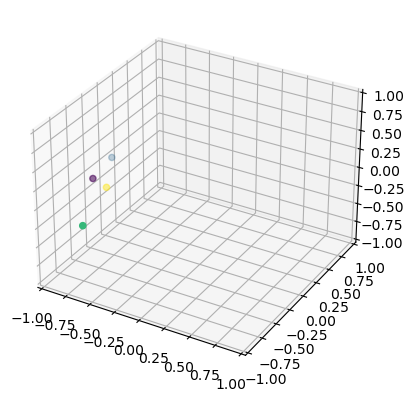

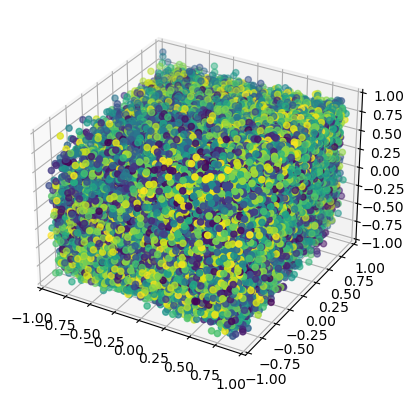

epoch 22
442/442 [==============================] - 5s 6ms/step - loss: 0.9742 - val_loss: 0.8270 - accuracy: 0.4133


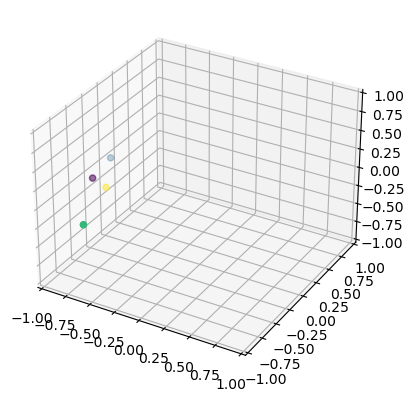

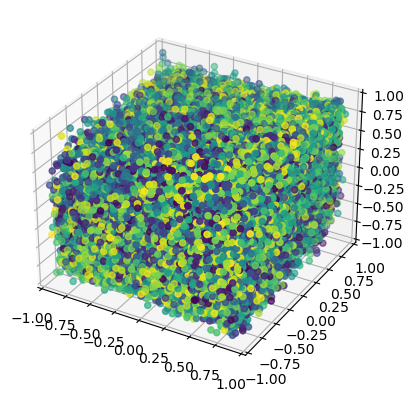

epoch 23
442/442 [==============================] - 5s 7ms/step - loss: 0.9736 - val_loss: 0.8267 - accuracy: 0.4143


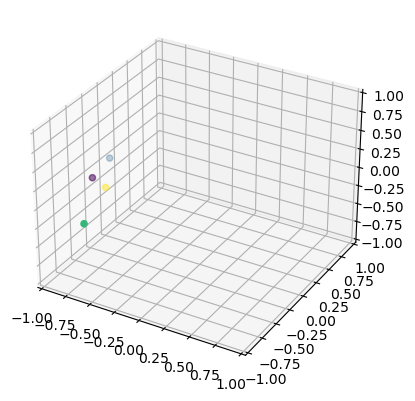

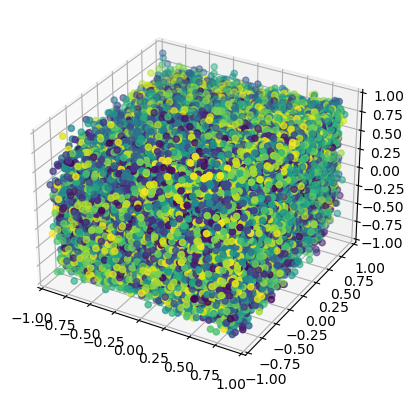

epoch 24
442/442 [==============================] - 5s 6ms/step - loss: 0.9730 - val_loss: 0.8264 - accuracy: 0.4159


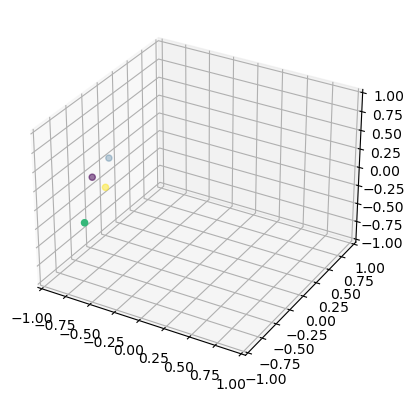

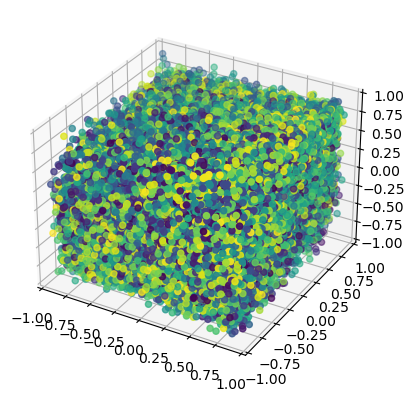

Binary accuracy: 0.7750376309944998


In [4]:
autoencoder_set = mixer.make_new(model_shapes, latent_dim, input_dims)
settings = {
    "training": [["$all", "$all", True, True]],#[[[k1], [k2 for k2 in keys if k1 != k2], True, True] for k1 in keys],
    #"encoder_proximity_training": [["$all", True]],
    "plot": [True, 3, [0, 1, 2]]
}
autoencoder_set.train_set(train, 25, autoencoder_set.make_train_config(settings = settings), batch_size = 64, verbose=True, track_num=42)
autoencoder_set.show_total_binary_accuracy(test)